# 2 ways to load HAM10000 dataset for skin cancer lesion classification

# Dataset link:
https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

# Data description: 
https://arxiv.org/ftp/arxiv/papers/1803/1803.10417.pdf

# The 7 classes of skin cancer lesions included in this dataset are:
    Melanocytic nevi (nv)
    Melanoma (mel)
    Benign keratosis-like lesions (bkl)
    Basal cell carcinoma (bcc) 
    Actinic keratoses (akiec)
    Vascular lesions (vas)
    Dermatofibroma (df)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# METHOD 1: 
    Read files using file name from the csv and add corresponding image in a pandas dataframe along with labels. 
    This requires lot of memory to hold all thousands of images. 
    Use datagen if you run into memory issues.

In [2]:
skin_df = pd.read_csv('E:/Final Year Project/data/HAM10000/HAM10000_metadata.csv')

In [3]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID

image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('E:/Final Year Project/data/HAM10000/', '*', '*.jpg'))}

In [4]:
#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)

In [5]:
#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [6]:
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


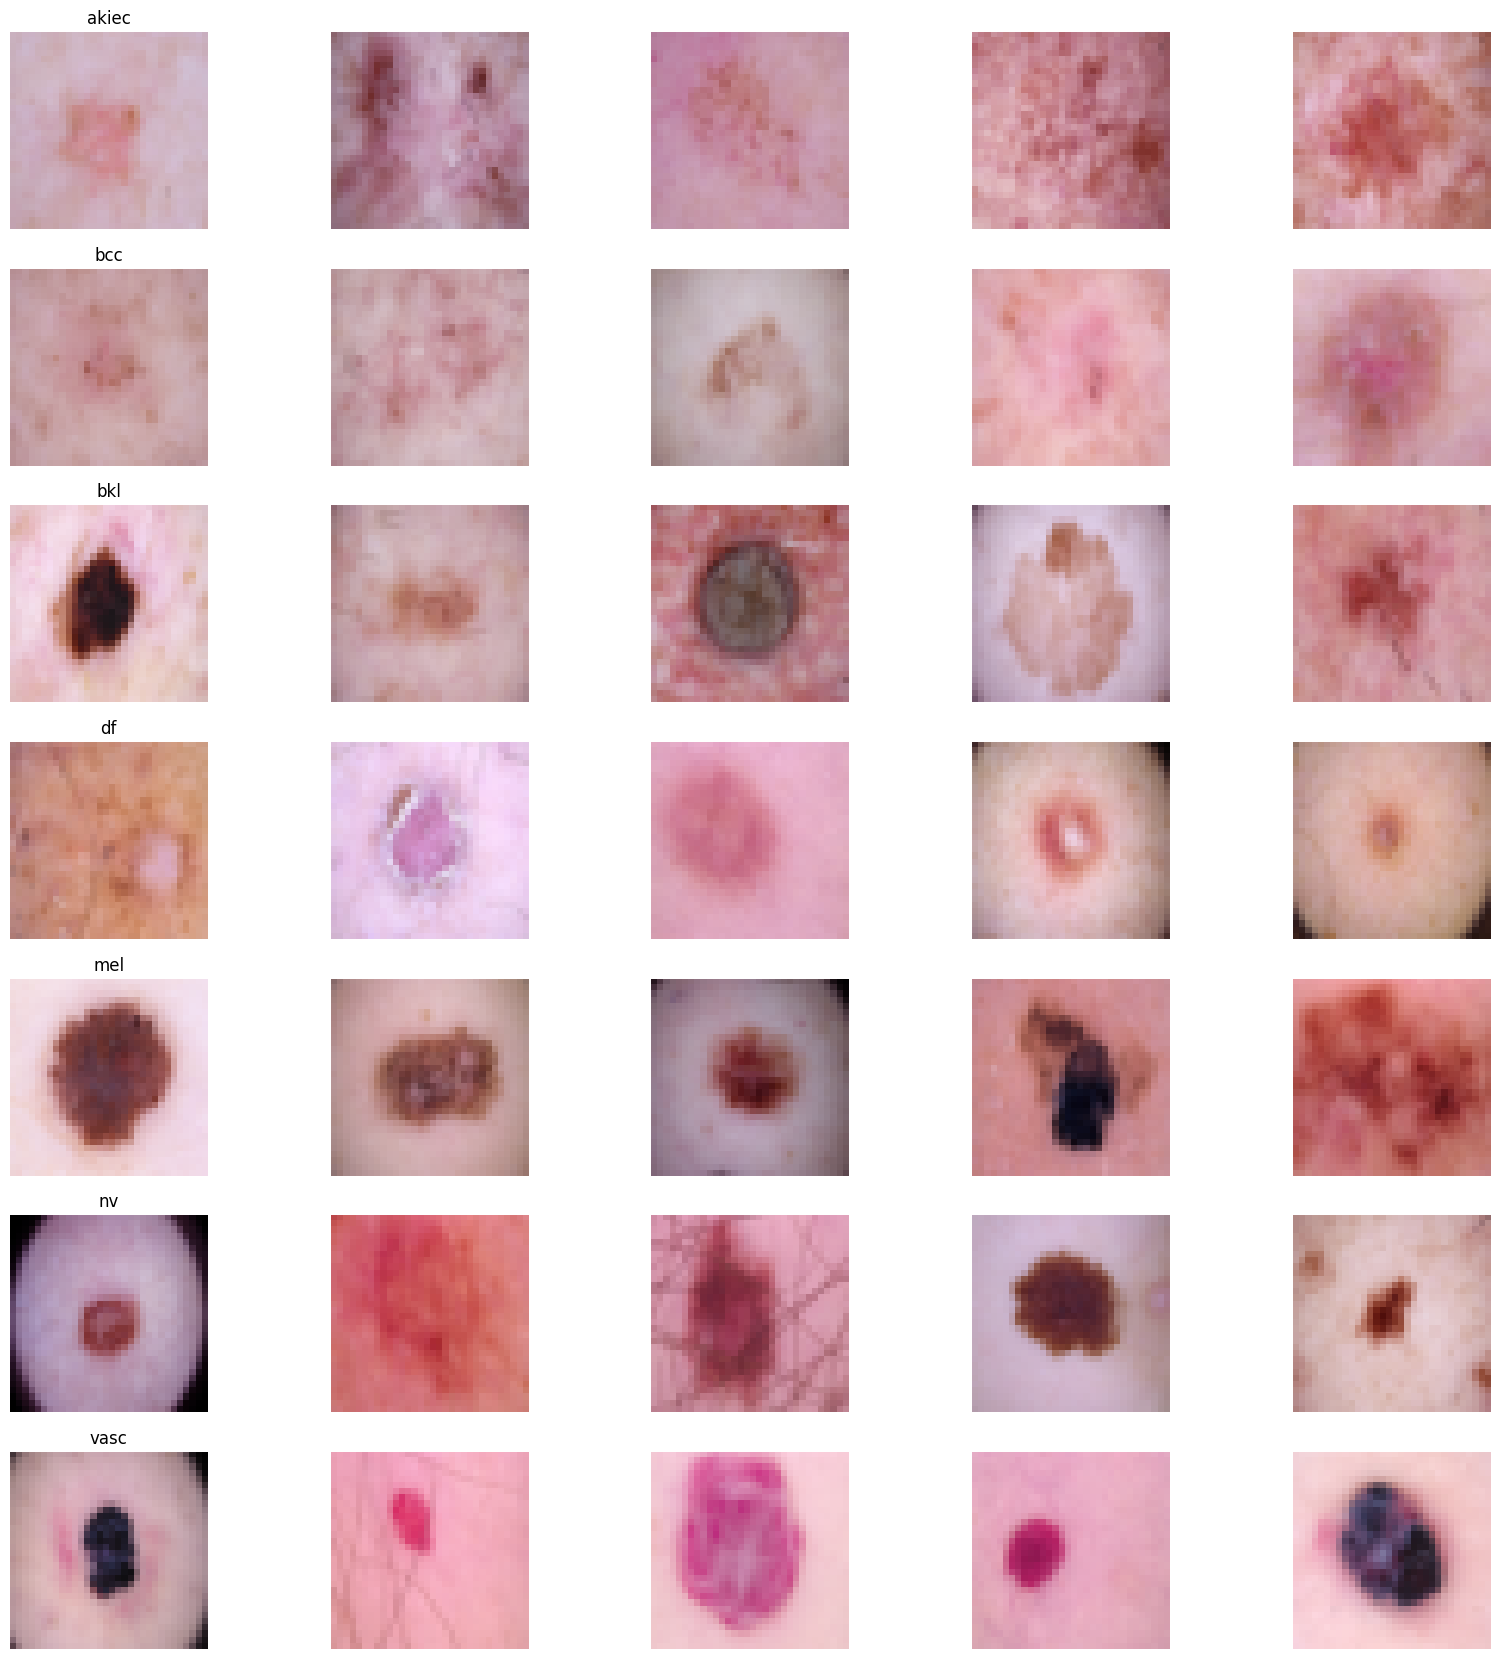

In [7]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

### Reorganize data into subfolders based on their labels then use keras flow_from_dir or pytorch ImageFolder to read images with folder names as labels

In [8]:
#Sort images to subfolders first 
import pandas as pd
import os
import shutil

In [24]:
# Dump all images into a folder and specify the path:
data_dir = os.getcwd() + "/data/all_images/"

In [25]:
# Path to destination directory where we want subfolders
dest_dir = os.getcwd() + "/data/reorganized/"

In [26]:
# Read the csv file containing image names and corresponding labels
skin_df2 = pd.read_csv('E:/Final Year Project/data/HAM10000/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [35]:
skin_df2.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [37]:
skin_disease_counts = skin_df['dx'].value_counts()

In [38]:
skin_disease_counts

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

### Plotting the data using different types of graphs

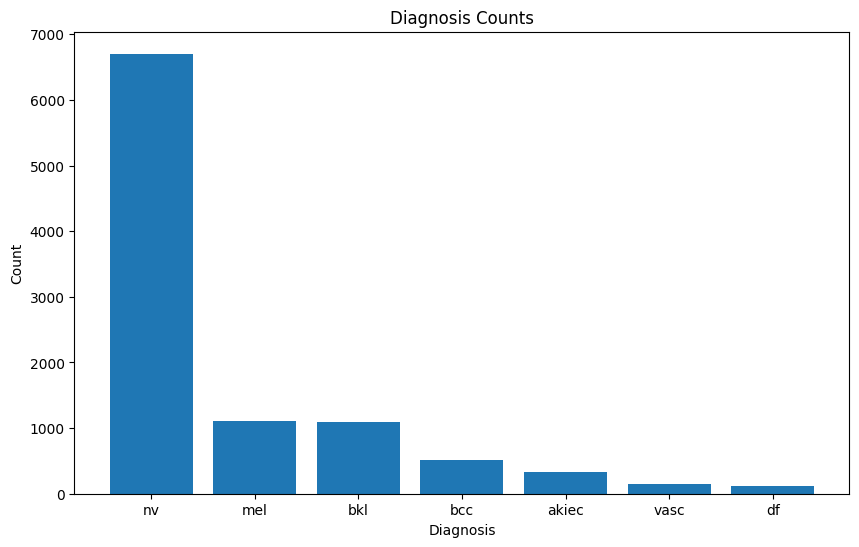

In [45]:
diagnoses = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']
counts = [6705, 1113, 1099, 514, 327, 142, 115]

# Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(diagnoses, counts)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts')
plt.show()


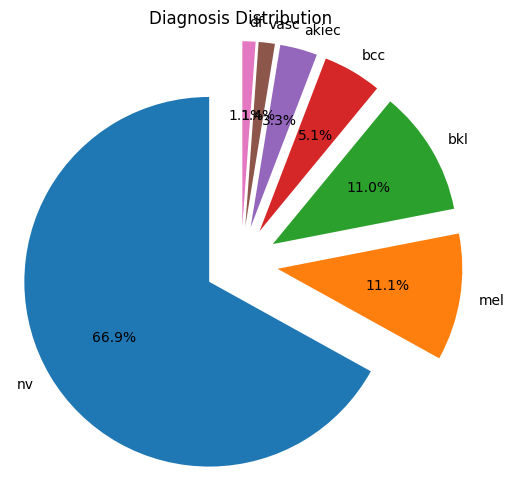

In [55]:
#Pie Chart
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)  # Explode the first slice (e.g., 'nv')
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=diagnoses, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Diagnosis Distribution')
plt.show()

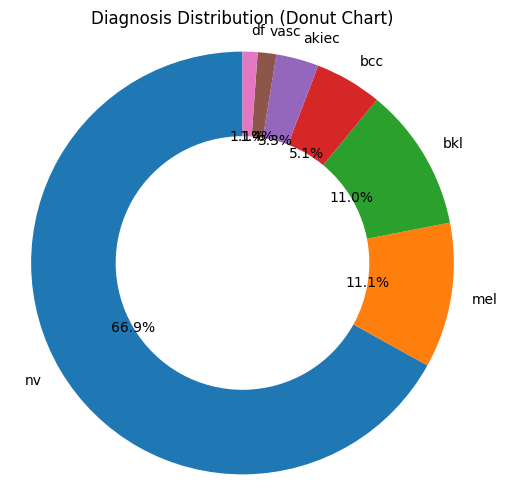

In [47]:
# Donut Chart 

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=diagnoses, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Diagnosis Distribution (Donut Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that it looks like a circle.
plt.show()

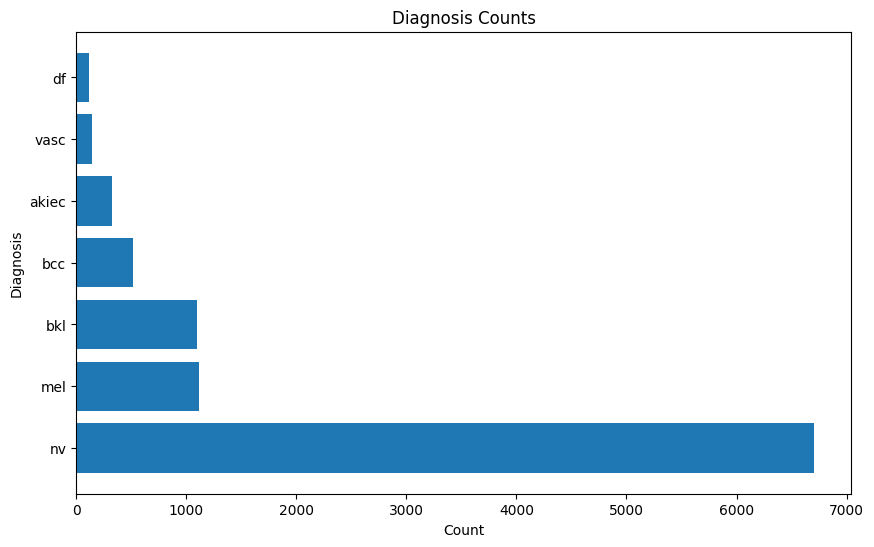

In [48]:
# Horizontal Bar Plot

plt.figure(figsize=(10, 6))
plt.barh(diagnoses, counts)
plt.ylabel('Diagnosis')
plt.xlabel('Count')
plt.title('Diagnosis Counts')
plt.show()

In [27]:
label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
label_images = []

In [28]:
# Copy images to new folders
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]

### Now we are ready to work with images in subfolders

## FOR Keras datagen
#### flow_from_directory Method
####  Useful when the images are sorted and placed in there respective class/label folders
#### Identifies classes automatically from the folder name. 
#### Create a data generator

In [29]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

In [30]:
#Define datagen. Here we can define any transformations we want to apply to images
datagen = ImageDataGenerator()

In [31]:
# define training directory that contains subfolders
train_dir = os.getcwd() + "/data/reorganized/"

In [32]:
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10015 images belonging to 7 classes.


In [33]:
#We can check images for a single batch.
x, y = next(train_data_keras)

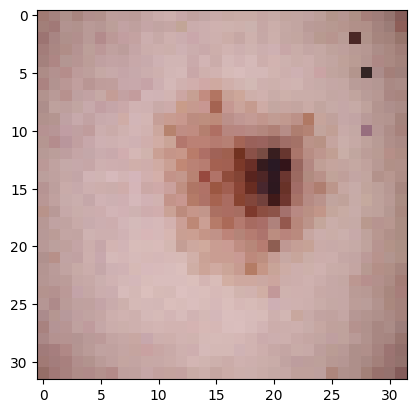

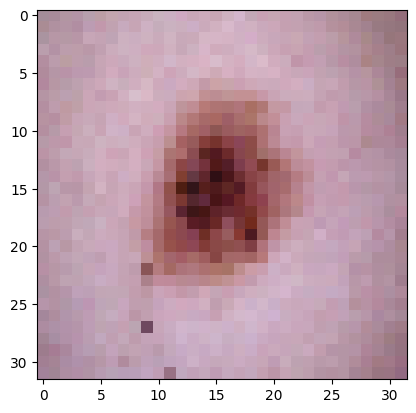

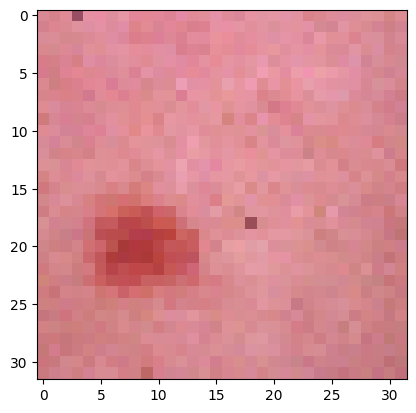

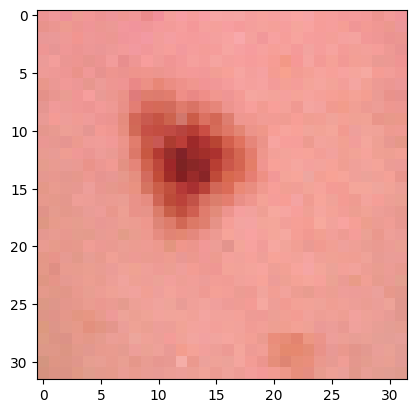

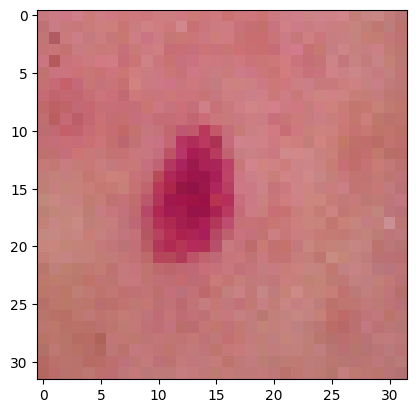

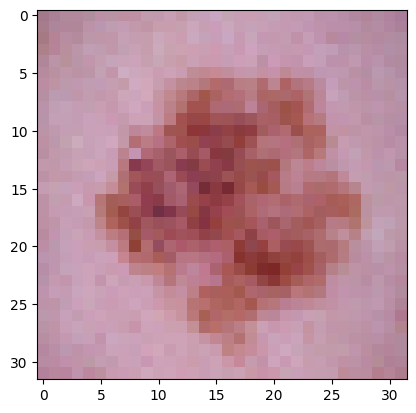

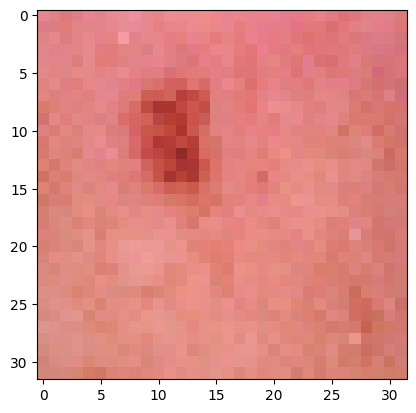

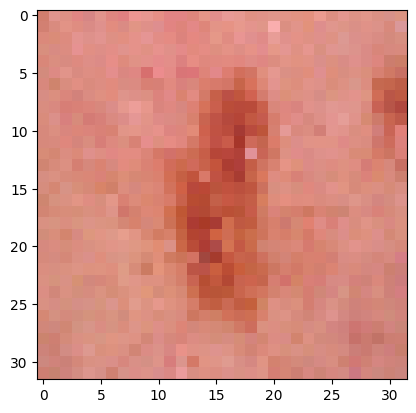

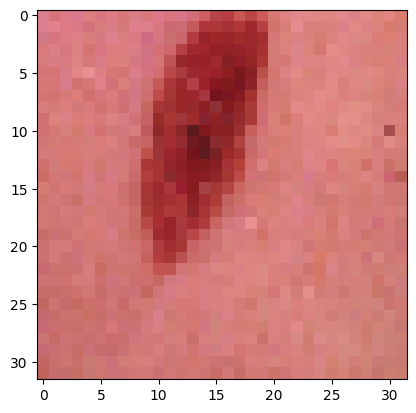

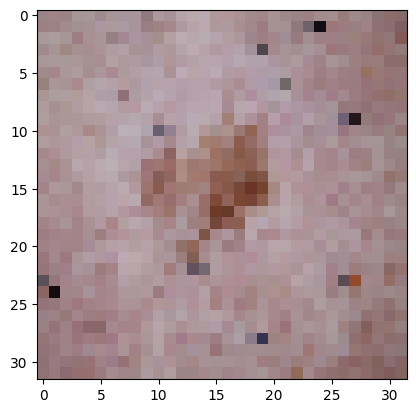

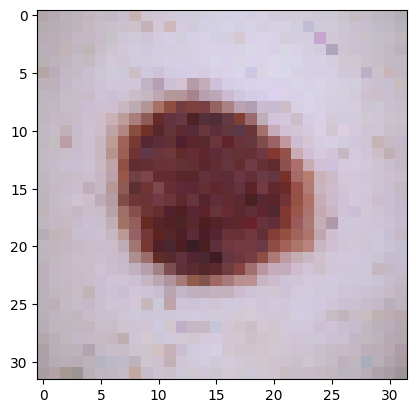

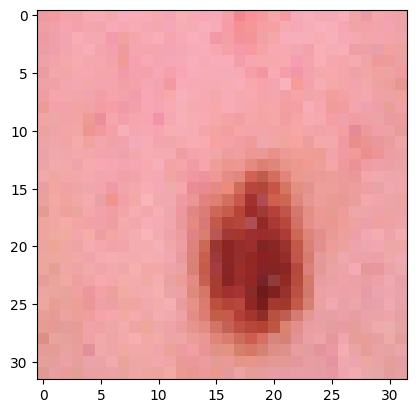

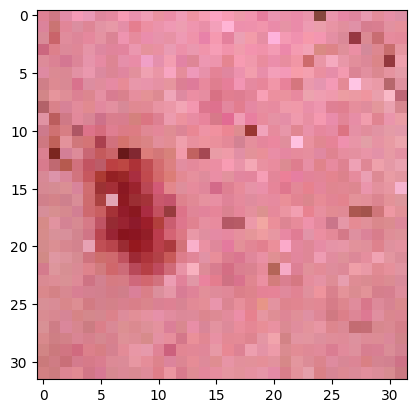

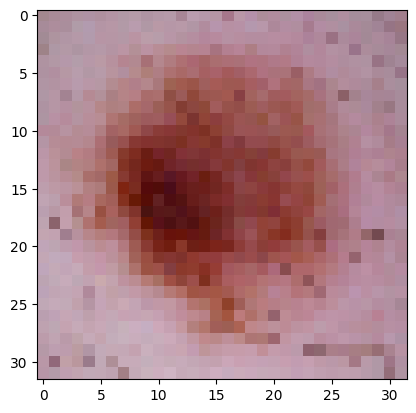

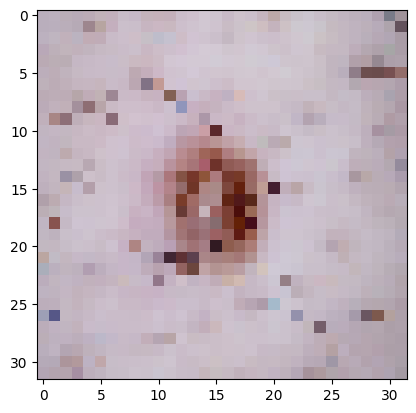

In [34]:
#View each image
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()